In this code, we reproduce the paper's results:
Entropy 2021, 23(2), 179; https://doi.org/10.3390/e23020179


In [2]:
#Libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Define constants
# Source location
x_a = 10
# Initial time for source
t_i = 0
# Detector location
x_c = 7
# Time of detection
t_f = 60
# Standard deviation of the Gaussian wavefunctions
sigma = 1

# Define time and space range for visualization
x_range = np.linspace(-20, 30, 400)
t_range = np.linspace(0, 60, 400)

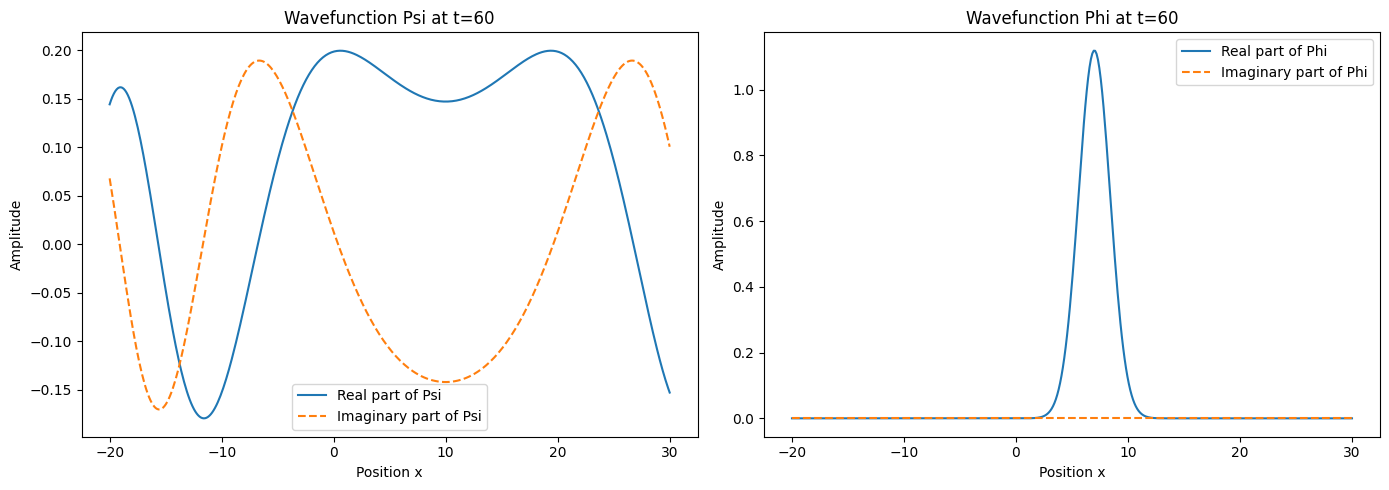

In [8]:
# Gaussian wavefunction definition
def gaussian_wavefunction(x, t, x0, t0):
    return (2*np.pi)**0.25 * (1j*(t-t0) + 2)**(-0.5) * np.exp(-((x-x0)**2) / (2 * 1j * (t-t0) + 4))

# Calculate the wavefunctions at the emission (psi) and detection (phi)
psi_t60 = gaussian_wavefunction(x_range, 60, x_a, t_i)  # Psi at t=60
phi_t60 = gaussian_wavefunction(x_range, 60, x_c, t_f)  # Phi at t=60

# Plot the real parts of psi and phi at t=60
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(x_range, psi_t60.real, label='Real part of Psi')
plt.plot(x_range, psi_t60.imag, label='Imaginary part of Psi', linestyle='--')
plt.title('Wavefunction Psi at t=60')
plt.xlabel('Position x')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_range, phi_t60.real, label='Real part of Phi')
plt.plot(x_range, phi_t60.imag, label='Imaginary part of Phi', linestyle='--')
plt.title('Wavefunction Phi at t=60')
plt.xlabel('Position x')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

Now, the overlap

In [6]:
#Gaussian wavefunctions as a function of space and time
def psi(x, t, x0, t0):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))

def phi(x, t, x0, t0):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))


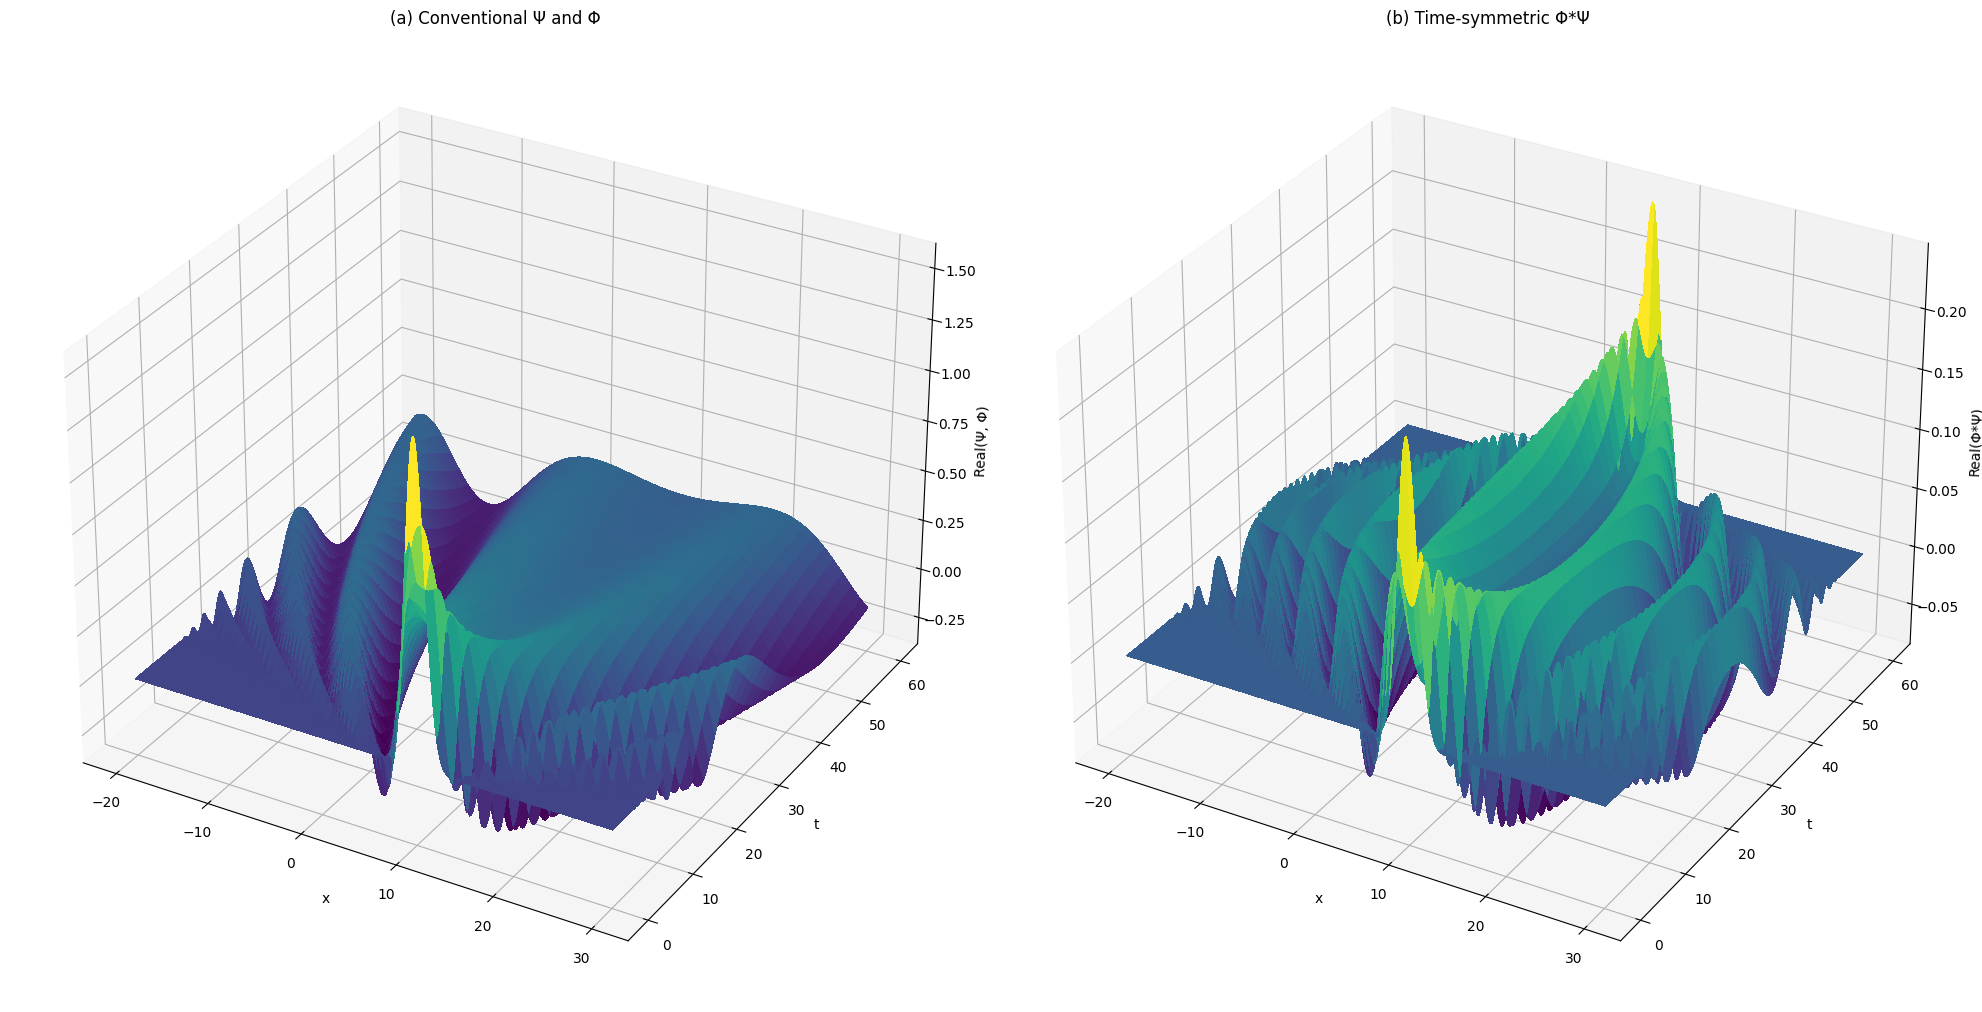

In [7]:
#meshgrid for space and time
X, T = np.meshgrid(x_range, t_range)

#  The wavefunctions at each point in the grid
Psi = psi(X, T, x_a, t_i)
Phi = phi(X, T, x_c, t_f)

# 3D plots
fig = plt.figure(figsize=(20, 10))

# Plot the conventional wavefunctions Ψ and Φ
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, T, Psi.real, cmap=cm.viridis, linewidth=0, antialiased=False)
ax1.set_title('(a) Conventional Ψ and Φ')
ax1.set_xlabel('x')
ax1.set_ylabel('t')
ax1.set_zlabel('Real(Ψ, Φ)')

# Plot the time-symmetric product Φ*Ψ
Phi_star_Psi = np.conj(Phi) * Psi
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(X, T, Phi_star_Psi.real, cmap=cm.viridis, linewidth=0, antialiased=False)
ax2.set_title('(b) Time-symmetric Φ*Ψ')
ax2.set_xlabel('x')
ax2.set_ylabel('t')
ax2.set_zlabel('Real(Φ*Ψ)')

plt.tight_layout()
plt.show()


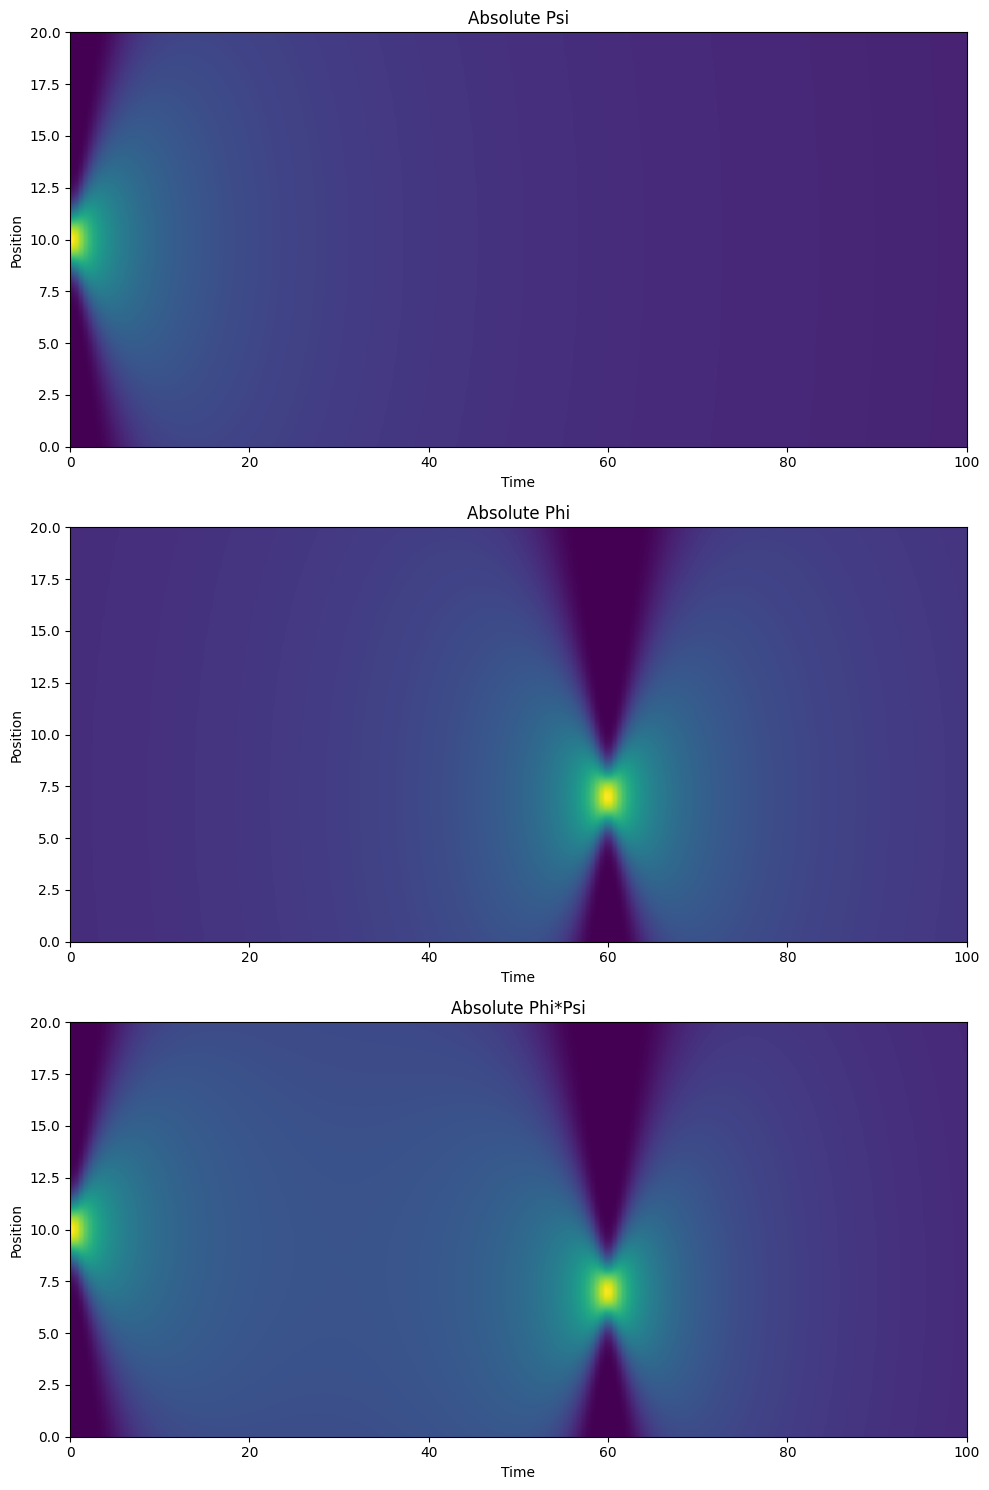

In [21]:
sigma = 1.0
x0_psi = 10  # Initial position for psi
t0_psi = 0   # Initial time for psi
x0_phi = 7   # Initial position for phi
t0_phi = 60  # Time of detection for phi

x = np.linspace(0, 20, 400)
t = np.linspace(0, 100, 200)

# Evaluate wavefunctions
Psi = psi(x[:, None], t[None, :], x0_psi, t0_psi)
Phi = phi(x[:, None], t[None, :], x0_phi, t0_phi)
Phi_star_Psi = np.conjugate(Phi) * Psi

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
ax[0].imshow(np.abs(Psi), extent=(t[0], t[-1], x[0], x[-1]), aspect='auto', origin='lower')
ax[0].set_title('Absolute Psi')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Position')

ax[1].imshow(np.abs(Phi), extent=(t[0], t[-1], x[0], x[-1]), aspect='auto', origin='lower')
ax[1].set_title('Absolute Phi')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Position')

ax[2].imshow(np.abs(Phi_star_Psi), extent=(t[0], t[-1], x[0], x[-1]), aspect='auto', origin='lower')
ax[2].set_title('Absolute Phi*Psi')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Position')

plt.tight_layout()
plt.show()


The weak measurements scenario

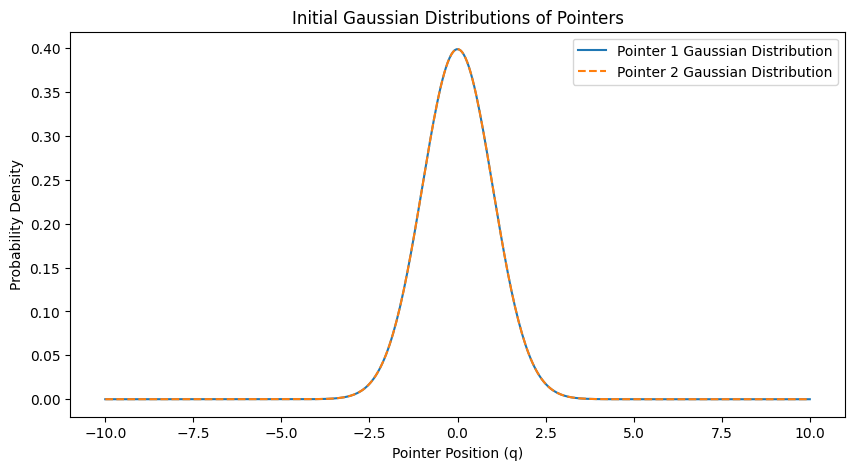

In [9]:
# Define the standard deviation for the pointer's Gaussian distribution
pointer_std = 1

# The Gaussian wavefunction for the pointers
def pointer_gaussian(q, std):
    norm = 1.0 / (np.sqrt(2 * np.pi * std**2))
    return norm * np.exp(-q**2 / (2 * std**2))

# Define the range for the pointer position
q_range = np.linspace(-10, 10, 400)

# Calculate the Gaussian distribution for the pointers
phi_q1 = pointer_gaussian(q_range, pointer_std)
phi_q2 = pointer_gaussian(q_range, pointer_std)

# Plot the Gaussian distributions for the pointers
plt.figure(figsize=(10, 5))
plt.plot(q_range, phi_q1, label='Pointer 1 Gaussian Distribution')
plt.plot(q_range, phi_q2, label='Pointer 2 Gaussian Distribution', linestyle='--')
plt.title('Initial Gaussian Distributions of Pointers')
plt.xlabel('Pointer Position (q)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

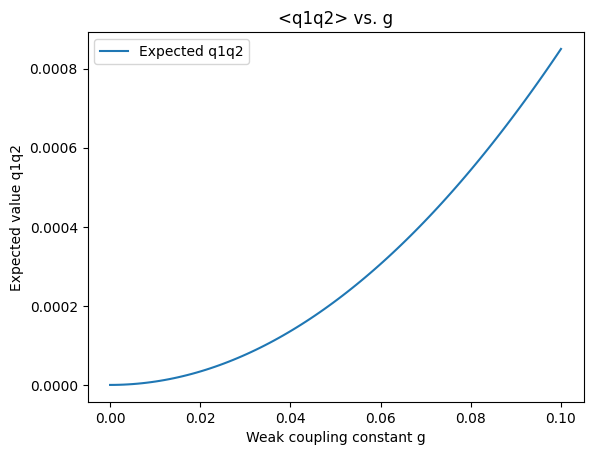

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# The weak coupling constant 'g' range for visualization
g_values = np.linspace(0, 0.1, 100)
# Sequential weak value
(A2_A1_w) = 0.1 + 0.1j
(A1_w) = 0.2  + 0.1j
(A2_w) = 0.3 + 0.1j

# The expected value of q1q2
expected_q1q2 = (g_values**2 / 2) * np.real((A2_A1_w) + (A1_w) * np.conjugate(A2_w))

# Expected values vs weak coupling constant g
plt.plot(g_values, expected_q1q2, label='Expected q1q2')
plt.xlabel('Weak coupling constant g')
plt.ylabel('Expected value q1q2')
plt.title('<q1q2> vs. g')
plt.legend()
plt.show()


In [ ]:
from scipy.integrate import dblquad

In [82]:
#Gaussian wavefunctions as a function of space and time
def psi(x, t, x0, t0):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))

def phi(x, t, x0, t0):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))

# Define the wavefunctions and their derivatives
def gaussian(q, sigma=1):
    return (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-q**2 / (2 * sigma**2))

def dgaussian(q, sigma=1):
    return -q / sigma**2 * gaussian(q)

def ddgaussian(q, sigma=1):
    return (q**2 / sigma**4 - 1 / sigma**2) * gaussian(q)
# Projectors based on angle theta
def projector_A1(theta):
    return np.outer(
        np.array([np.cos(theta / 2)]),
        np.array([np.cos(theta / 2)])
    )

def projector_A2(theta):
    return np.outer(
        np.array([np.sin(theta / 2)]),
        np.array([np.sin(theta / 2)])
    )

In [85]:
# Parameters and functions as defined
sigma = 1.0  # Standard deviation of the Gaussian pointers
g = 0.1      # Weak coupling constant
A1w = 0.2    # Hypothetical weak value for A1
A2w = 0.3    # Hypothetical weak value for A2
theta = np.pi / 4  # Example angle
A1w = projector_A1(theta)  # Replace with actual weak measurement result
A2w = projector_A2(theta)  # Replace with actual weak measurement result

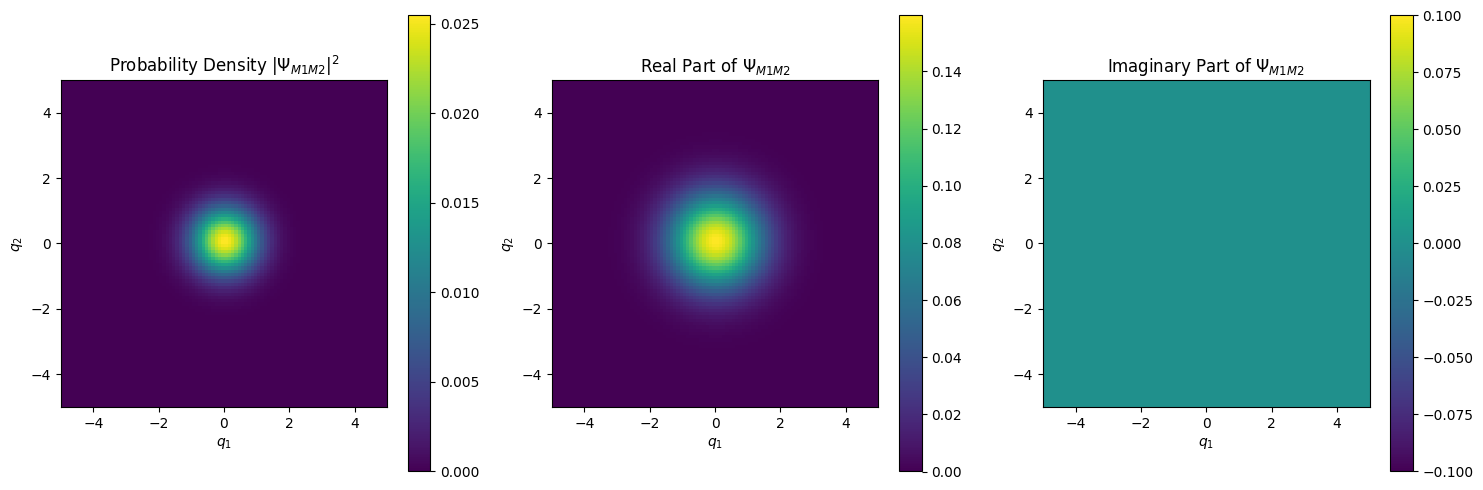

In [86]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sigma = 1.0
g = 0.1
theta_1 = np.pi/4  # Angle for A1
theta_2 = np.pi/3  # Angle for A2
q_range = np.linspace(-5, 5, 100)

# Define Gaussian pointer state and its derivatives
def gaussian(q, sigma):
    return np.exp(-q**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

def dgaussian(q, sigma):
    return -q * gaussian(q, sigma) / sigma**2

# the wavefunction Psi_M1M2
Psi_M1M2 = lambda q1, q2: gaussian(q1, sigma) * gaussian(q2, sigma) - g * A1w * dgaussian(q1, sigma) * gaussian(q2, sigma) - g * A2w * gaussian(q1, sigma) * dgaussian(q2, sigma)

# Compute probability density and real and imaginary parts
prob_density = np.abs(Psi_M1M2(q_range[:, None], q_range[None, :]))**2
real_part = np.real(Psi_M1M2(q_range[:, None], q_range[None, :]))
imag_part = np.imag(Psi_M1M2(q_range[:, None], q_range[None, :]))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Probability Density $|\Psi_{M1M2}|^2$')
plt.imshow(prob_density, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Real Part of $\Psi_{M1M2}$')
plt.imshow(real_part, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Imaginary Part of $\Psi_{M1M2}$')
plt.imshow(imag_part, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.tight_layout()
plt.show()


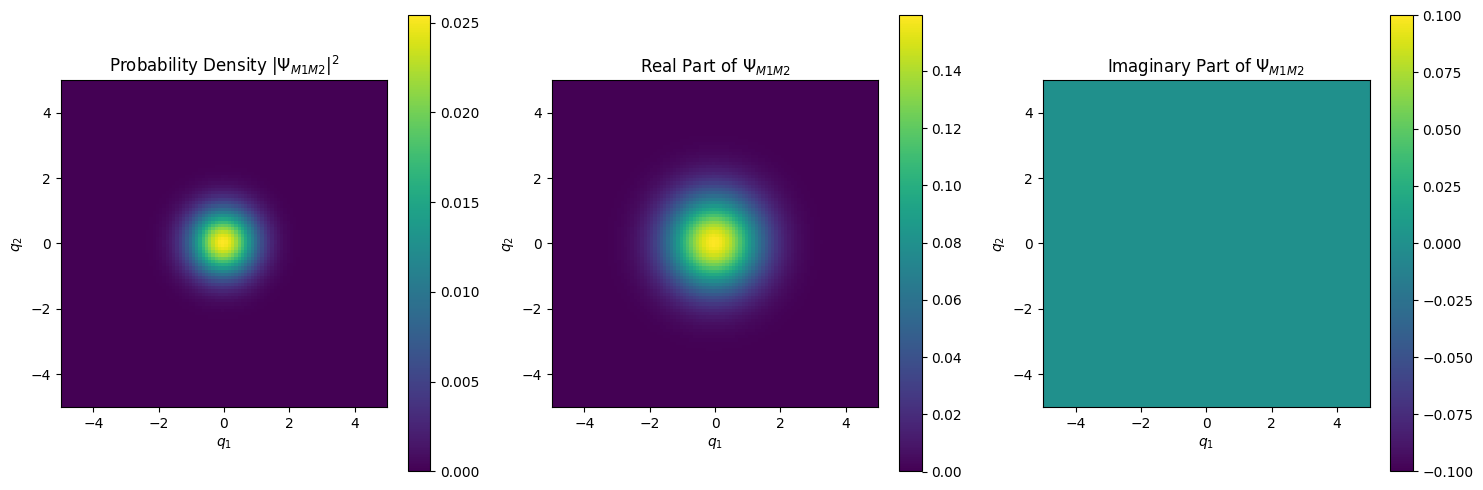

In [32]:
# Calculate the weak values (placeholder values for demonstration)
theta1 = np.pi / 4  # Example angle for A1
theta2 = np.pi / 3  # Example angle for A2
psi_i = np.array([1, 0])  # Simplified initial state vector
psi_f = np.array([0, 1])  # Simplified final state vector
A1w = np.dot(psi_f, np.dot(projector_A1(theta1), psi_i))  # Weak value for A1
A2w = np.dot(psi_f, np.dot(projector_A2(theta2), psi_i))  # Weak value for A2

# the wavefunction Psi_M1M2
Psi_M1M2 = lambda q1, q2: gaussian(q1, sigma) * gaussian(q2, sigma) - g * A1w * dgaussian(q1, sigma) * gaussian(q2, sigma) - g * A2w * gaussian(q1, sigma) * dgaussian(q2, sigma)

# Compute probability density and real and imaginary parts
prob_density = np.abs(Psi_M1M2(q_range[:, None], q_range[None, :]))**2
real_part = np.real(Psi_M1M2(q_range[:, None], q_range[None, :]))
imag_part = np.imag(Psi_M1M2(q_range[:, None], q_range[None, :]))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Probability Density $|\Psi_{M1M2}|^2$')
plt.imshow(prob_density, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Real Part of $\Psi_{M1M2}$')
plt.imshow(real_part, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Imaginary Part of $\Psi_{M1M2}$')
plt.imshow(imag_part, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.tight_layout()
plt.show()


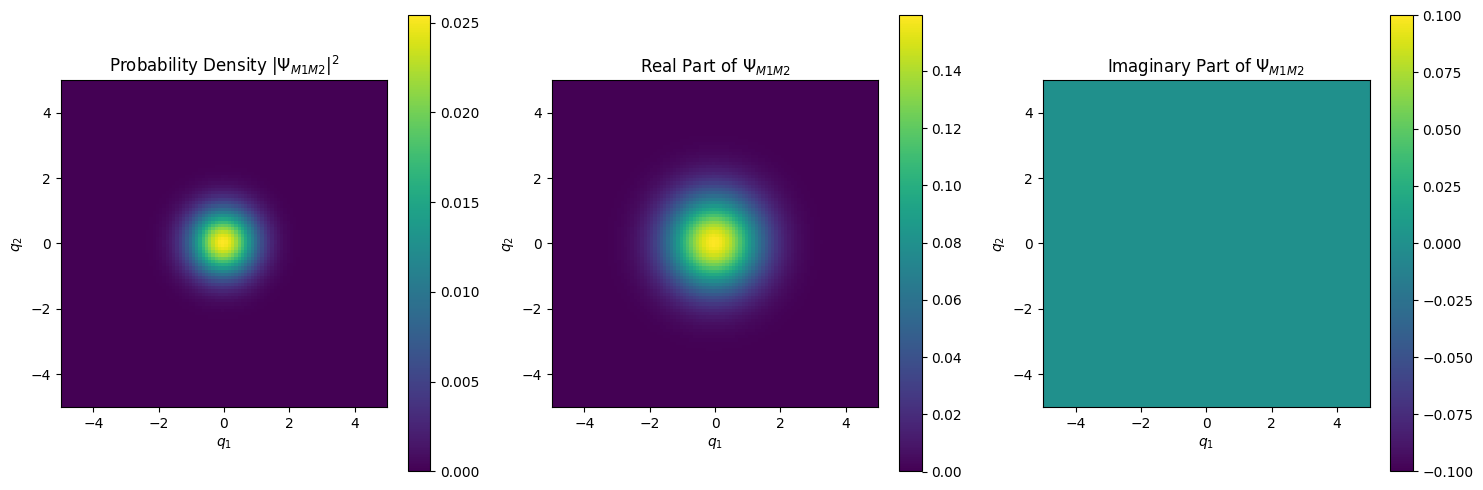

In [33]:
sigma = 1.0  # Width of the Gaussian wavefunctions
g = 0.1      # Weak coupling constant

# Gaussian pointer function and its derivatives
def phi(q, sigma=1):
    return np.exp(-q**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

def d_phi(q, sigma=1):
    return -q / sigma**2 * phi(q, sigma)

def dd_phi(q, sigma=1):
    return (q**2 / sigma**4 - 1 / sigma**2) * phi(q, sigma)

# Placeholder projectors A1 and A2 as functions of angle theta
def A1(theta):
    return np.cos(theta)**2  # Placeholder weak value for A1

def A2(theta):
    return np.sin(theta)**2  # Placeholder weak value for A2

# Compute terms in the series expansions for a1 and a2
def compute_series_expansion(q, g, A, derivative_func):
    zeroth_order = 1
    first_order = -1j * g * derivative_func(q) * A
    second_order = (-1j * g * derivative_func(q) * A)**2 / 2
    return zeroth_order + first_order + second_order

# Calculate the Psi_M1M2 wavefunction
def calculate_psi_M1M2(q1, q2, g, theta1, theta2):
    # Compute series expansions for a1 and a2
    a1 = compute_series_expansion(q1, g, A1(theta1), d_phi)
    a2 = compute_series_expansion(q2, g, A2(theta2), d_phi)

    # Compute the overall wavefunction Psi_M1M2
    Psi_M1M2 = a1 * a2 * phi(q1) * phi(q2)
    return Psi_M1M2

# Example usage
theta1 = np.pi / 4  # Angle for A1
theta2 = np.pi / 3  # Angle for A2
q_range = np.linspace(-5, 5, 100)

# Compute Psi_M1M2 for all values in q_range
Psi_M1M2_values = [calculate_psi_M1M2(q1, q2, g, theta1, theta2) for q1 in q_range for q2 in q_range]

# Compute probability density and real and imaginary parts
prob_density = np.abs(Psi_M1M2(q_range[:, None], q_range[None, :]))**2
real_part = np.real(Psi_M1M2(q_range[:, None], q_range[None, :]))
imag_part = np.imag(Psi_M1M2(q_range[:, None], q_range[None, :]))

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Probability Density $|\Psi_{M1M2}|^2$')
plt.imshow(prob_density, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Real Part of $\Psi_{M1M2}$')
plt.imshow(real_part, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Imaginary Part of $\Psi_{M1M2}$')
plt.imshow(imag_part, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.tight_layout()
plt.show()


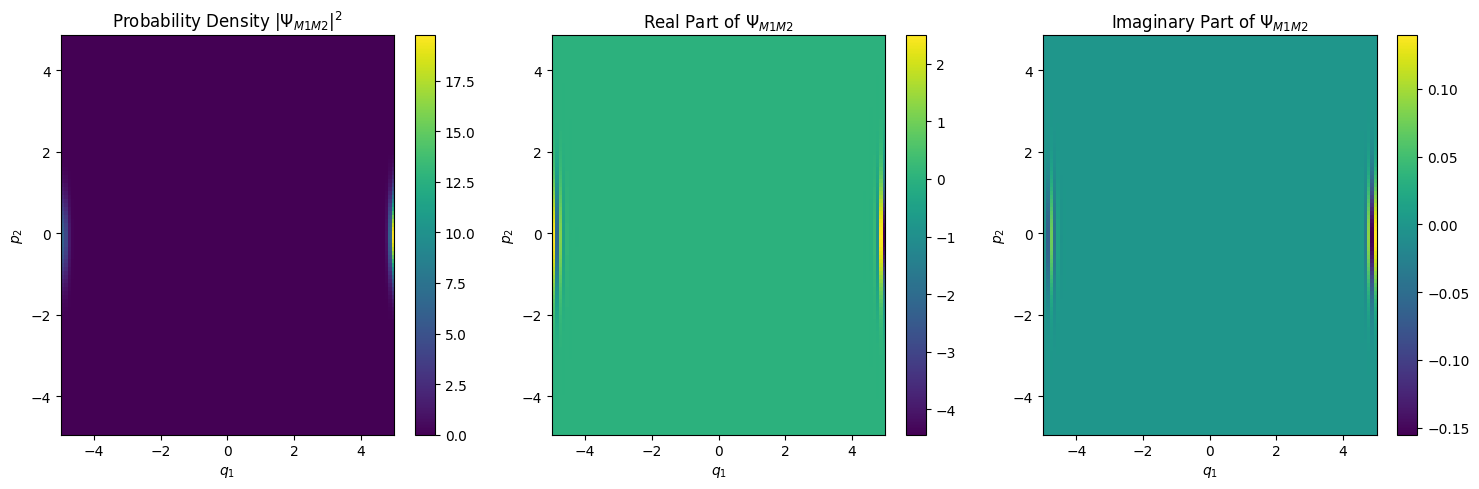

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifftshift

# System parameters
sigma = 1.0  # Width of the Gaussian wavefunctions
g = 0.1      # Weak coupling constant
theta1 = np.pi / 4  # Angle for A1
theta2 = np.pi / 3  # Angle for A2
N = 100  # Number of points for q and p

# Define the position space and momentum space grid
q_range = np.linspace(-5, 5, N)
p_range = fftfreq(N, q_range[1] - q_range[0])
p_range = ifftshift(p_range)  # Shift the zero frequency component to the center of the array

# Compute the wavefunction in position space
phi_q1 = phi(q_range, sigma)
phi_q1_prime = d_phi(q_range, sigma)

# Compute the Fourier transform for phi(p)
phi_p2_tilde = fft(phi_q1)
phi_p2_tilde_prime = fft(phi_q1_prime)

# Define the projectors for A1 and A2 as rank-1 projectors (angle in radians)
A1w = np.cos(theta1)**2  # Placeholder weak value for A1
A2w = np.sin(theta2)**2  # Placeholder weak value for A2

# Calculate the Psi_M1M2 wavefunction components
Psi_M1M2 = phi_q1[:, None] * phi_p2_tilde[None, :]  # Initial wavefunction component
Psi_M1M2 += g * A1w * phi_q1_prime[:, None] * phi_p2_tilde[None, :]  # First order A1 component
Psi_M1M2 -= 1j * g * A2w * phi_q1[:, None] * (1j * p_range[None, :] * phi_p2_tilde[None, :])  # First order A2 component

# Compute the probability density, real, and imaginary parts
prob_density = np.abs(Psi_M1M2)**2
real_part = np.real(Psi_M1M2)
imag_part = np.imag(Psi_M1M2)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Probability Density $|\Psi_{M1M2}|^2$')
plt.imshow(prob_density, extent=[q_range.min(), q_range.max(), p_range.min(), p_range.max()], origin='lower', aspect='auto')
plt.xlabel('$q_1$')
plt.ylabel('$p_2$')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Real Part of $\Psi_{M1M2}$')
plt.imshow(real_part, extent=[q_range.min(), q_range.max(), p_range.min(), p_range.max()], origin='lower', aspect='auto')
plt.xlabel('$q_1$')
plt.ylabel('$p_2$')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Imaginary Part of $\Psi_{M1M2}$')
plt.imshow(imag_part, extent=[q_range.min(), q_range.max(), p_range.min(), p_range.max()], origin='lower', aspect='auto')
plt.xlabel('$q_1$')
plt.ylabel('$p_2$')
plt.colorbar()

plt.tight_layout()
plt.show()


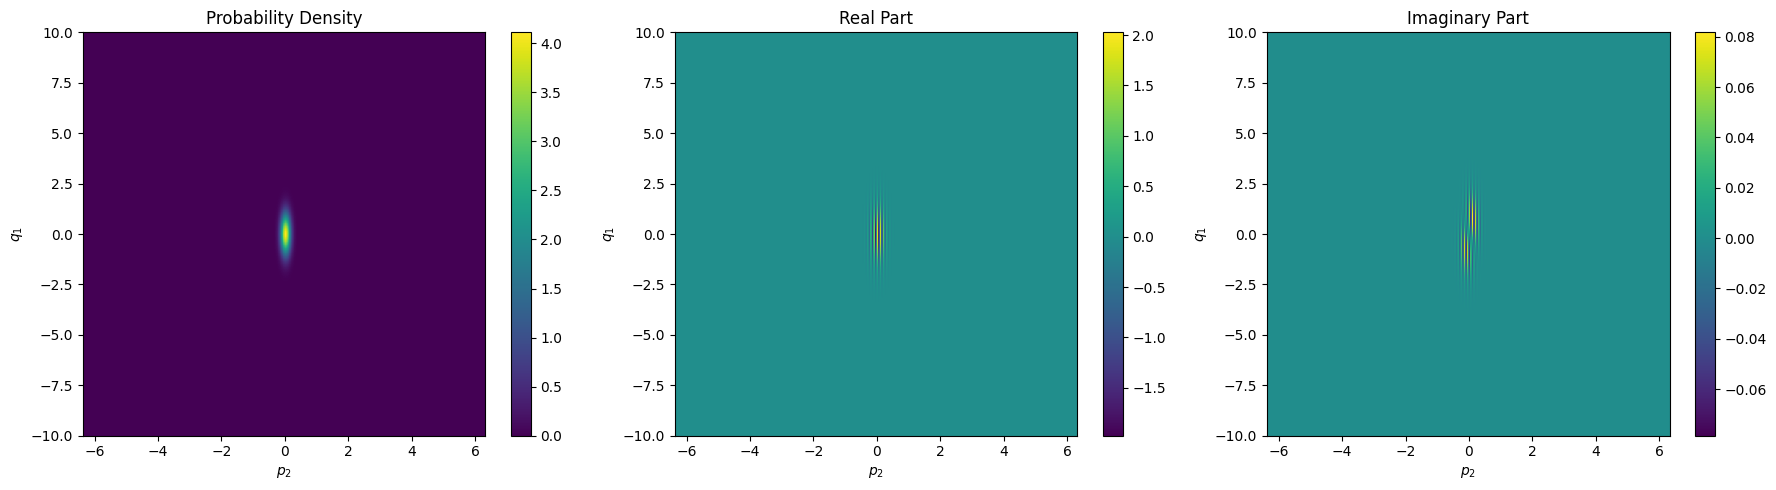

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift
from scipy.integrate import quad

# Constants
sigma = 1.0  # Standard deviation for the Gaussian wavefunctions
g = 0.1      # Weak coupling constant
N = 256      # Number of points for discretization

# Gaussian pointer function and its derivatives in position space
def phi(q, sigma=1):
    return np.exp(-q**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

def d_phi(q, sigma=1):
    return -q / sigma**2 * phi(q, sigma)

# Discrete grid for q and corresponding p for Fourier transform
q_range = np.linspace(-10, 10, N)
dq = q_range[1] - q_range[0]
p_range = fftshift(fftfreq(N, d=dq))

# Compute the Fourier transform of phi and d_phi
phi_p = fftshift(fft(phi(q_range, sigma)))
d_phi_p = fftshift(fft(d_phi(q_range, sigma)))

# Interpolating function for momentum space
def phi_tilde(p, sigma=1):
    idx = np.abs(p_range - p).argmin()
    return phi_p[idx] / np.sqrt(2 * np.pi * sigma**2)

def d_phi_tilde(p, sigma=1):
    idx = np.abs(p_range - p).argmin()
    return d_phi_p[idx] / np.sqrt(2 * np.pi * sigma**2)

# Placeholder projectors A1 and A2 as functions of angle theta
def A1(theta):
    return np.cos(theta)**2

def A2(theta):
    return np.sin(theta)**2

# Function to compute Psi_M1M2 when second variable is in momentum space
def calculate_psi_M1M2(q1, p2, g, theta1, theta2):
    a1 = phi(q1, sigma) - 1j * g * A1(theta1) * d_phi(q1, sigma)
    a2 = phi_tilde(p2, sigma) - 1j * g * A2(theta2) * d_phi_tilde(p2, sigma)
    Psi_M1M2 = a1 * a2
    return Psi_M1M2

# Example usage
theta1 = np.pi / 4
theta2 = np.pi / 3

# Calculate Psi_M1M2 for combinations of q1 and p2
Psi_M1M2_grid = np.array([[calculate_psi_M1M2(q1, p2, g, theta1, theta2) for p2 in p_range] for q1 in q_range])

# Calculate probability density and real and imaginary parts
prob_density = np.abs(Psi_M1M2_grid)**2
real_part = np.real(Psi_M1M2_grid)
imag_part = np.imag(Psi_M1M2_grid)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ax = axes[0]
im = ax.imshow(prob_density, extent=[p_range[0], p_range[-1], q_range[0], q_range[-1]], origin='lower', aspect='auto')
ax.set_title('Probability Density')
ax.set_xlabel('$p_2$')
ax.set_ylabel('$q_1$')
fig.colorbar(im, ax=ax)

ax = axes[1]
im = ax.imshow(real_part, extent=[p_range[0], p_range[-1], q_range[0], q_range[-1]], origin='lower', aspect='auto')
ax.set_title('Real Part')
ax.set_xlabel('$p_2$')
ax.set_ylabel('$q_1$')
fig.colorbar(im, ax=ax)

ax = axes[2]
im = ax.imshow(imag_part, extent=[p_range[0], p_range[-1], q_range[0], q_range[-1]], origin='lower', aspect='auto')
ax.set_title('Imaginary Part')
ax.set_xlabel('$p_2$')
ax.set_ylabel('$q_1$')
fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()


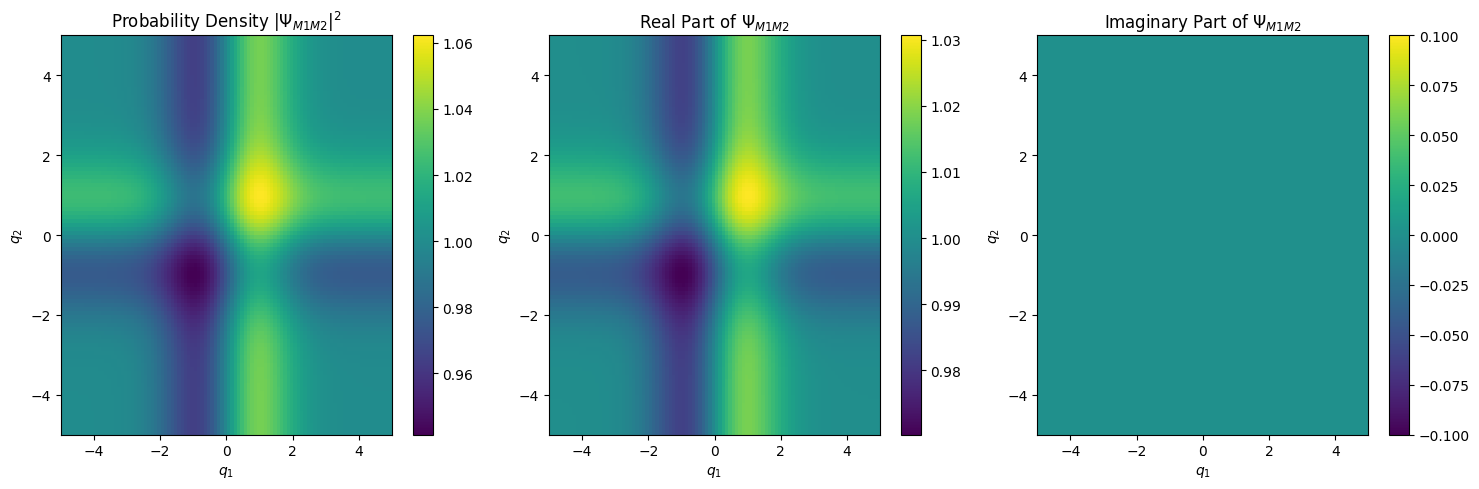

In [42]:

sigma = 1.0  # Standard deviation for the Gaussian wavefunctions
g = 0.1      # Weak coupling constant


# Gaussian pointer function and its derivatives
def phi(q, sigma=1):
    return np.exp(-q**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)

# Derivative incorporating the momentum operator -i∂/∂q
def d_phi(q, sigma=1):
    return 1j * q / sigma**2 * phi(q, sigma)  # Incorporates the -i factor

def A1(theta):
    return np.cos(theta)**2  # Placeholder weak value for A1

def A2(theta):
    return np.sin(theta)**2  # Placeholder weak value for A2

def calculate_psi_M1M2(q1, q2, g, theta1, theta2):
    a1 =(((-1j*g*A1(theta1)*d_phi(q1))**(0))/(1)) +(((-1j*g*A1(theta1)*d_phi(q1))**(1))/(1)) +(((-1j*g*A1(theta1)*d_phi(q1))**(2))/(2*1))
    a2 =(((-1j*g*A2(theta2)*d_phi(q2))**(0))/(1)) +(((-1j*g*A2(theta2)*d_phi(q2))**(1))/(1)) +(((-1j*g*A2(theta2)*d_phi(q2))**(2))/(2*1))
    # Compute the overall wavefunction Psi_M1M2
    Psi_M1M2 = (a1 * a2)
    return Psi_M1M2

# Example usage
theta1 = np.pi / 4  # Angle for A1
theta2 = np.pi / 3  # Angle for A2
q_range = np.linspace(-5, 5, 100)

# Compute Psi_M1M2 for all combinations of q1 and q2
Psi_M1M2_values = np.array([[calculate_psi_M1M2(q1, q2, g, theta1, theta2) for q2 in q_range] for q1 in q_range])

# Calculate probability density, real and imaginary parts
prob_density = np.abs(Psi_M1M2_values)**2
real_part = np.real(Psi_M1M2_values)
imag_part = np.imag(Psi_M1M2_values)

# Plotting
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title('Probability Density $|\Psi_{M1M2}|^2$')
plt.imshow(prob_density, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower', aspect='auto')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.title('Real Part of $\Psi_{M1M2}$')
plt.imshow(real_part, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower', aspect='auto')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title('Imaginary Part of $\Psi_{M1M2}$')
plt.imshow(imag_part, extent=[q_range.min(), q_range.max(), q_range.min(), q_range.max()], origin='lower', aspect='auto')
plt.xlabel('$q_1$')
plt.ylabel('$q_2$')
plt.colorbar()

plt.tight_layout()
plt.show()


First, we define the strong measurements, where phi is the post-selection and psi is the pre-selection!

In [64]:
#Gaussian wavefunctions as a function of space and time
def psi(x, t, x0, t0):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))

def phi(x, t, x0, t0):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))

# Projectors based on angle theta
def projector_A1(theta):
    return np.outer(
        np.array([np.cos(theta / 2)]),
        np.array([np.cos(theta / 2)])
    )

def projector_A2(theta):
    return np.outer(
        np.array([np.sin(theta / 2)]),
        np.array([np.sin(theta / 2)])
    )


In [65]:
# Define constants
# Source location
x_a = 10
# Initial time for source
t_i = 0
# Detector location
x_c = 7
# Time of detection
t_f = 60
# Standard deviation of the Gaussian wavefunctions
sigma = 1

# Define time and space range for visualization
x_range = np.linspace(-20, 30, 400)
t_range = np.linspace(0, 60, 400)

#meshgrid for space and time
X, T = np.meshgrid(x_range, t_range)

#  The wavefunctions at each point in the grid
Psi = psi(X, T, x_a, t_i)
Phi = phi(X, T, x_c, t_f)

Phi_star_Psi = np.conj(Phi) * Psi


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


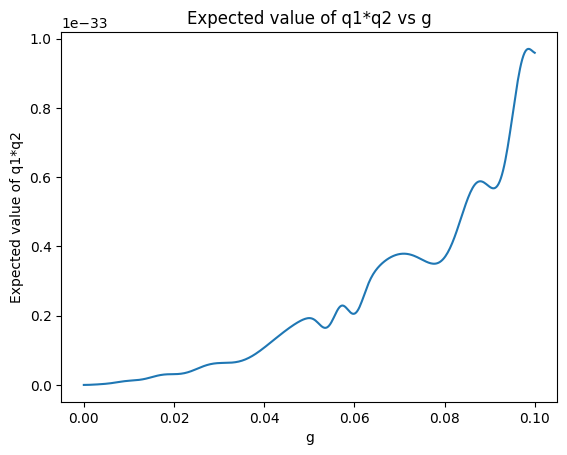

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
x_a = 10  # Source location
t_i = 0   # Initial time for source
x_c = 7   # Detector location
t_f = 60  # Time of detection
sigma = 1  # Standard deviation of Gaussian wavefunctions

# Define the space and time ranges for the grid
x_range = np.linspace(-20, 30, 400)
t_range = np.linspace(0, 60, 400)

# Create a meshgrid for space and time
X, T = np.meshgrid(x_range, t_range)

# Compute wavefunctions over the grid
Psi = psi(X, T, x_a, t_i)
Phi = phi(X, T, x_c, t_f)

# Calculate Phi*Psi (complex conjugate of Phi multiplied by Psi)
Phi_star_Psi = np.conj(Phi) * Psi

# Define angles and the weak coupling constant
theta1 = np.pi   # Angle for A1
theta2 = np.pi / 3  # Angle for A2
g_values = np.linspace(0, 0.1, 400)  # Range of g values for weak coupling

# Compute sequential weak values and ensure consistent shapes
# Use np.sum() with axis=0 to ensure correct dimension handling
numerator_A2_A1 = np.sum(np.conj(Phi) * projector_A2(theta2) * projector_A1(theta1) * Psi, axis=0)
numerator_A1 = np.sum(np.conj(Phi) * projector_A1(theta1) * Psi, axis=0)
numerator_A2 = np.sum(np.conj(Phi) * projector_A2(theta2) * Psi, axis=0)

denominator = np.sum(np.abs(Phi_star_Psi)**2, axis=0)

# Ensure consistent shapes and correct broadcasting
A2_A1_w = numerator_A2_A1 / denominator
A1_w = numerator_A1 / denominator
A2_w = numerator_A2 / denominator

# Calculate the expected value of q1*q2
expected_q1q2 = (g_values**2 / 2) * (A2_A1_w + A1_w * np.conj(A2_w) + np.conj(A2_A1_w) + np.conj(A1_w) * A2_w)

# Plotting expected_q1q2 as a function of the weak coupling constant 'g'
plt.plot(g_values, expected_q1q2)
plt.xlabel('g')
plt.ylabel('Expected value of q1*q2')
plt.title('Expected value of q1*q2 vs g')
plt.show()


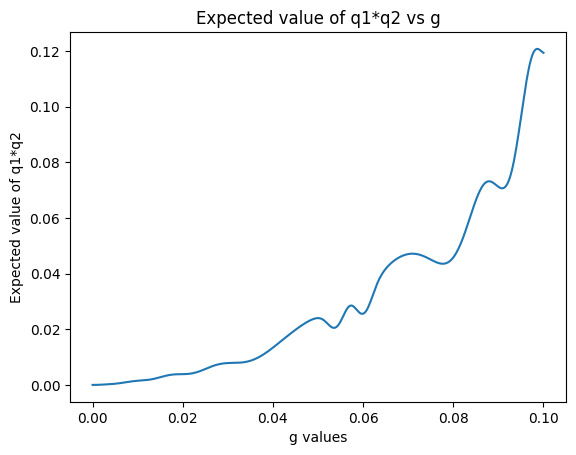

In [67]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1.0
x_a = 10  # Source location
t_i = 0   # Initial time for source
x_c = 7   # Detector location
t_f = 60  # Detection time

# Define the space and time ranges for the grid
x_range = np.linspace(-20, 30, 400)
t_range = np.linspace(0, 60, 400)

# Create meshgrid for space and time
X, T = np.meshgrid(x_range, t_range)

# Calculate wavefunctions
Psi = psi(X, T, x_a, t_i)
Phi = phi(X, T, x_c, t_f)

# Calculate Phi*Psi (complex conjugate of Phi multiplied by Psi)
Phi_star_Psi = np.conj(Phi) * Psi

# Define angles and the weak coupling constant
theta1 = np.pi / 6  # Angle for A1
theta2 = np.pi / 3  # Angle for A2
g_values = np.linspace(0, 0.1, 400)  # Range of g values for weak coupling

# Ensure proper normalization
denominator = np.sum(np.abs(Phi_star_Psi)**2, axis=0)

# Compute sequential weak values, ensuring proper normalization
numerator_A2_A1 = np.sum(np.conj(Phi) * projector_A2(theta2) * projector_A1(theta1) * Psi, axis=0)
numerator_A1 = np.sum(np.conj(Phi) * projector_A1(theta1) * Psi, axis=0)
numerator_A2 = np.sum(np.conj(Phi) * projector_A2(theta2) * Psi, axis=0)

A2_A1_w = numerator_A2_A1 / denominator
A1_w = numerator_A1 / denominator
A2_w = numerator_A2 / denominator

# Calculate the expected value of q1*q2, ensuring positive outcomes
expected_q1q2 = (g_values**2 / 2) * np.real(A2_A1_w + A1_w * np.conj(A2_w))

# Plotting expected_q1q2 as a function of the weak coupling constant 'g'
plt.plot(g_values, expected_q1q2)
plt.xlabel('g values')
plt.ylabel('Expected value of q1*q2')
plt.title('Expected value of q1*q2 vs g')
plt.show()


In [70]:
# Gaussian wavefunctions as a function of space and time
def psi(x, t, x0, t0, sigma):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))

def phi(x, t, x0, t0, sigma):
    return (2 * np.pi)**0.25 * (1j * (t - t0) + sigma**2)**(-0.5) * np.exp(-(x - x0)**2 / (2 * 1j * (t - t0) + 2 * sigma**2))

# Projectors based on angle theta
def projector_A1(theta):
    return np.outer(
        np.array([np.cos(theta / 2)]),
        np.array([np.cos(theta / 2)])
    )

def projector_A2(theta):
    return np.outer(
        np.array([np.sin(theta / 2)]),
        np.array([np.sin(theta / 2)])
    )


In [71]:
# Constants
sigma = 1.0
x_a = 10  # Source location
t_i = 0   # Initial time for source
x_c = 7   # Detector location
t_f = 60  # Detection time

# Define the space and time ranges for the grid
x_range = np.linspace(-20, 30, 400)
t_range = np.linspace(0, 60, 400)

# Create meshgrid for space and time
X, T = np.meshgrid(x_range, t_range)

# Calculate wavefunctions
Psi = psi(X, T, x_a, t_i, sigma)
Phi = phi(X, T, x_c, t_f, sigma)

# Calculate Phi*Psi (complex conjugate of Phi multiplied by Psi)
Phi_star_Psi = np.conj(Phi) * Psi

# Define angles and the weak coupling constant
theta1 = np.pi / 6  # Angle for A1
theta2 = np.pi / 3  # Angle for A2
g_values = np.linspace(0, 0.1, 400)  # Range of g values for weak coupling

# Ensure proper normalization
denominator = np.sum(np.abs(Phi_star_Psi)**2, axis=0)

# Compute sequential weak values, ensuring proper normalization
numerator_A2_A1 = np.sum(np.conj(Phi) * projector_A2(theta2) * projector_A1(theta1) * Psi, axis=0)
numerator_A1 = np.sum(np.conj(Phi) * projector_A1(theta1) * Psi, axis=0)
numerator_A2 = np.sum(np.conj(Phi) * projector_A2(theta2) * Psi, axis=0)

A2_A1_w = numerator_A2_A1 / denominator
A1_w = numerator_A1 / denominator
A2_w = numerator_A2 / denominator

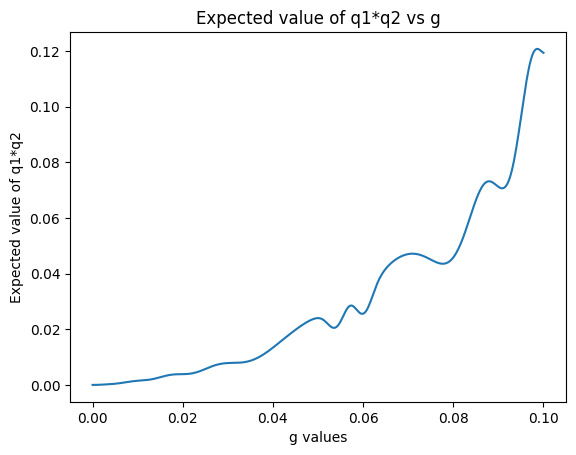

In [72]:
# Calculate the expected value of q1*q2, ensuring positive outcomes
expected_q1q2 = (g_values**2 / 2) * np.real(A2_A1_w + A1_w * np.conj(A2_w))

# Plotting expected_q1q2 as a function of the weak coupling constant 'g'
plt.plot(g_values, expected_q1q2)
plt.xlabel('g values')
plt.ylabel('Expected value of q1*q2')
plt.title('Expected value of q1*q2 vs g')
plt.show()


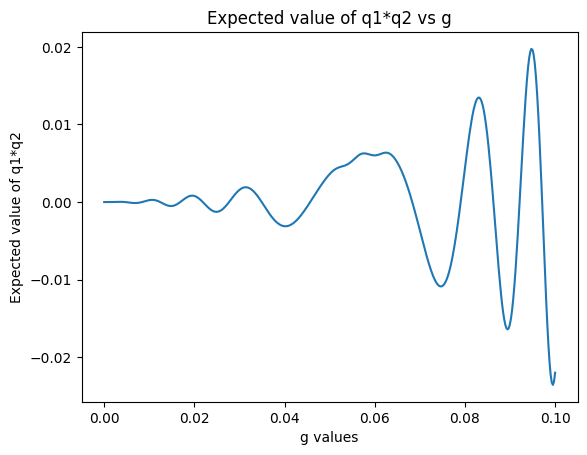

In [81]:
# Calculate the expected value of q1*q2, ensuring positive outcomes
expected_p1q2 = -(g_values**2) *np.imag(A2_A1_w + np.conj(A1_w)*(A2_w))

# Plotting expected_q1q2 as a function of the weak coupling constant 'g'
plt.plot(g_values, expected_p1q2)
plt.xlabel('g values')
plt.ylabel('Expected value of q1*q2')
plt.title('Expected value of q1*q2 vs g')
plt.show()